#Activity 14




##Prepare data

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from keras.optimizers import SGD
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from keras.utils.vis_utils import plot_model
import time



Bringing in the data file to assign as the dataset

---



In [53]:
url = 'https://raw.githubusercontent.com/pango3001/AI/main/project/adult1.csv'

#numpy darray
data = np.genfromtxt(url, delimiter=",", skip_header = True) 

#panda dataframe
dataset = pd.read_csv(url, delimiter=',')
dataset.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,country,earnings
0,39,3,77516,13,13,0,0,1,1,2174,0,40,1,0
1,50,2,83311,13,13,1,1,1,1,0,0,13,1,0
2,38,1,215646,10,9,2,0,1,1,0,0,40,1,0
3,53,1,234721,6,7,1,1,2,1,0,0,40,1,0
4,28,1,338409,13,13,1,2,2,0,0,0,40,14,0


Splitting my data into training and validation sets

In [54]:
# Shuffling the dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Convert Pandas DataSet to Numpy Array
dataset_np = dataset.values
X = dataset.drop('earnings', axis='columns').values
Y = dataset['earnings'].values

In [55]:
# Index for 30%
index_30percent = int(0.3 * len(dataset_np[:, 0]))  
print(index_30percent)

# Split into validation (30%) and training (70%)
XVALID = X[:index_30percent, :]
YVALID = Y[:index_30percent]
XTRAIN = X[index_30percent:, :]
YTRAIN = Y[index_30percent:]

9768


In [56]:
# Mean normalization
Xmin = XTRAIN.min(axis = 0) 
Xmax = XTRAIN.max(axis = 0) 
mean = XTRAIN.mean(axis = 0)
XTRAIN = (XTRAIN - mean) / (Xmax - Xmin)
XVALID = (XVALID - mean) / (Xmax - Xmin)

# Rescaling
Ymax = YTRAIN.max()
YTRAIN = YTRAIN / Ymax
YVALID = YVALID / Ymax

## Setup Models

In [57]:
# Setting up the models

# Base model 1 input, 1 output
model_base = Sequential([ 
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# adding a middle layer
model_middle = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# adding another hidden layer
model_4_layers = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# adding multiple hidden layers
model_mult_layers = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=10, activation='relu'),
                    Dense(units=8, activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# linear activation on last layer
model_linear_last = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=1, activation='linear')
])

# linear activation on all layers
model_linear_all = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='linear'),
                    Dense(units=6, activation='linear'),
                    Dense(units=1, activation='linear')
])

# sigmoid activation on all layers
model_sigmoid_all = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='sigmoid'),
                    Dense(units=6, activation='sigmoid'),
                    Dense(units=1, activation='sigmoid')
])

# Overfitted model
model_overfitted = Sequential([
                    Dense(units=120, input_dim = len(XTRAIN[0, :]), activation='linear'),
                    Dense(units=60, activation='linear'),
                    Dense(units=1, activation='linear')
])




In [58]:
model_base.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 12)                168       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 13        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


Now we must compile each model to prepare it for the .fit() function

In [59]:
model_base.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_middle.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_4_layers.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_mult_layers.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_linear_last.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_linear_all.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_sigmoid_all.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_overfitted.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [60]:
history1 = model_base.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5031 - accuracy: 0.7662 - val_loss: 0.4353 - val_accuracy: 0.7913
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4162 - accuracy: 0.8085 - val_loss: 0.4072 - val_accuracy: 0.8100
Epoch 3/100
357/357 [==============================] - 1s 1ms/step - loss: 0.3971 - accuracy: 0.8188 - val_loss: 0.3917 - val_accuracy: 0.8149
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3824 - accuracy: 0.8238 - val_loss: 0.3760 - val_accuracy: 0.8214
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3681 - accuracy: 0.8286 - val_loss: 0.3623 - val_accuracy: 0.8282
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3562 - accuracy: 0.8334 - val_loss: 0.3518 - val_accuracy: 0.8321
Epoch 7/100
357/357 [==============================] - 1s 1ms/step - loss: 0.3479 - accuracy: 0.8363 - val_loss: 0.3451 - val_accuracy: 0.8345

In [61]:
history2 = model_middle.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5001 - accuracy: 0.7495 - val_loss: 0.4249 - val_accuracy: 0.7813
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4015 - accuracy: 0.8143 - val_loss: 0.3846 - val_accuracy: 0.8184
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3710 - accuracy: 0.8277 - val_loss: 0.3592 - val_accuracy: 0.8269
Epoch 4/100
357/357 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.8376 - val_loss: 0.3426 - val_accuracy: 0.8386
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3376 - accuracy: 0.8427 - val_loss: 0.3351 - val_accuracy: 0.8433
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3326 - accuracy: 0.8443 - val_loss: 0.3317 - val_accuracy: 0.8444
Epoch 7/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3302 - accuracy: 0.8458 - val_loss: 0.3301 - val_accuracy: 0.8443

In [62]:
history3 = model_4_layers.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5428 - accuracy: 0.7283 - val_loss: 0.4437 - val_accuracy: 0.7554
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4254 - accuracy: 0.7610 - val_loss: 0.4120 - val_accuracy: 0.7607
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3922 - accuracy: 0.8189 - val_loss: 0.3716 - val_accuracy: 0.8246
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3565 - accuracy: 0.8360 - val_loss: 0.3464 - val_accuracy: 0.8359
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3396 - accuracy: 0.8422 - val_loss: 0.3361 - val_accuracy: 0.8406
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3324 - accuracy: 0.8453 - val_loss: 0.3334 - val_accuracy: 0.8436
Epoch 7/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3294 - accuracy: 0.8468 - val_loss: 0.3306 - val_accuracy: 0.8448

In [63]:
history4 = model_mult_layers.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4781 - accuracy: 0.7802 - val_loss: 0.3982 - val_accuracy: 0.8163
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3761 - accuracy: 0.8260 - val_loss: 0.3538 - val_accuracy: 0.8346
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3461 - accuracy: 0.8387 - val_loss: 0.3374 - val_accuracy: 0.8441
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.8423 - val_loss: 0.3332 - val_accuracy: 0.8438
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3325 - accuracy: 0.8448 - val_loss: 0.3303 - val_accuracy: 0.8442
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3309 - accuracy: 0.8457 - val_loss: 0.3297 - val_accuracy: 0.8430
Epoch 7/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3284 - accuracy: 0.8462 - val_loss: 0.3278 - val_accuracy: 0.8446

In [64]:
history5 = model_linear_last.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.9644 - accuracy: 0.7536 - val_loss: 0.5223 - val_accuracy: 0.7519
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4991 - accuracy: 0.7780 - val_loss: 0.4839 - val_accuracy: 0.7915
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4749 - accuracy: 0.7999 - val_loss: 0.4620 - val_accuracy: 0.7963
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4546 - accuracy: 0.8064 - val_loss: 0.4458 - val_accuracy: 0.8058
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4365 - accuracy: 0.8125 - val_loss: 0.4328 - val_accuracy: 0.8102
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4201 - accuracy: 0.8144 - val_loss: 0.4174 - val_accuracy: 0.8116
Epoch 7/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4117 - accuracy: 0.8170 - val_loss: 0.4094 - val_accuracy: 0.8134

In [65]:
history6 = model_linear_all.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.7913 - accuracy: 0.7550 - val_loss: 0.5225 - val_accuracy: 0.7550
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4950 - accuracy: 0.7623 - val_loss: 0.4661 - val_accuracy: 0.7629
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4660 - accuracy: 0.7781 - val_loss: 0.4450 - val_accuracy: 0.7811
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4490 - accuracy: 0.7902 - val_loss: 0.4383 - val_accuracy: 0.7883
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4427 - accuracy: 0.7945 - val_loss: 0.4371 - val_accuracy: 0.7946
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4410 - accuracy: 0.8002 - val_loss: 0.4337 - val_accuracy: 0.8001
Epoch 7/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4369 - accuracy: 0.8039 - val_loss: 0.4367 - val_accuracy: 0.7988

In [66]:
history7 = model_sigmoid_all.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5398 - accuracy: 0.7608 - val_loss: 0.5285 - val_accuracy: 0.7554
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4920 - accuracy: 0.7616 - val_loss: 0.4644 - val_accuracy: 0.7637
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4425 - accuracy: 0.7873 - val_loss: 0.4321 - val_accuracy: 0.7950
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4233 - accuracy: 0.8049 - val_loss: 0.4206 - val_accuracy: 0.8028
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4161 - accuracy: 0.8081 - val_loss: 0.4161 - val_accuracy: 0.8055
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4124 - accuracy: 0.8095 - val_loss: 0.4132 - val_accuracy: 0.8080
Epoch 7/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4101 - accuracy: 0.8114 - val_loss: 0.4109 - val_accuracy: 0.8074

In [67]:
history8 = model_overfitted.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5163 - accuracy: 0.7958 - val_loss: 2.3091 - val_accuracy: 0.5649
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 1.1447 - accuracy: 0.7522 - val_loss: 0.7793 - val_accuracy: 0.7890
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.6860 - accuracy: 0.7991 - val_loss: 0.5730 - val_accuracy: 0.8067
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4908 - accuracy: 0.8107 - val_loss: 0.4597 - val_accuracy: 0.8100
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4323 - accuracy: 0.8128 - val_loss: 0.4262 - val_accuracy: 0.8083
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4376 - accuracy: 0.7991 - val_loss: 0.4175 - val_accuracy: 0.8062
Epoch 7/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5463 - accuracy: 0.7965 - val_loss: 0.9304 - val_accuracy: 0.7676

In [68]:
def get_accuracy(model):
    scores = model.evaluate(XTRAIN, YTRAIN)
    percent = (scores[1] * 100.0)
    formatted_percent = "{:.2f}".format(percent)
    print("Training set Accuracy: ", formatted_percent , "%")

In [69]:
get_accuracy(model_base)

713/713 [==============================] - 1s 1ms/step - loss: 0.3196 - accuracy: 0.8499
Training set Accuracy:  84.99 %


In [70]:
get_accuracy(model_middle)

713/713 [==============================] - 1s 1ms/step - loss: 0.3139 - accuracy: 0.8528
Training set Accuracy:  85.28 %


In [71]:
get_accuracy(model_mult_layers)

713/713 [==============================] - 1s 1ms/step - loss: 0.3144 - accuracy: 0.8512
Training set Accuracy:  85.12 %


In [72]:
get_accuracy(model_4_layers)

713/713 [==============================] - 1s 1ms/step - loss: 0.3090 - accuracy: 0.8554
Training set Accuracy:  85.54 %


In [73]:
get_accuracy(model_linear_last)

713/713 [==============================] - 1s 1ms/step - loss: 0.3294 - accuracy: 0.8473
Training set Accuracy:  84.73 %


In [74]:
get_accuracy(model_linear_all)

713/713 [==============================] - 1s 1ms/step - loss: 0.4488 - accuracy: 0.8041
Training set Accuracy:  80.41 %


In [75]:
get_accuracy(model_sigmoid_all)

713/713 [==============================] - 1s 1ms/step - loss: 0.3273 - accuracy: 0.8460
Training set Accuracy:  84.60 %


In [76]:
get_accuracy(model_overfitted)

713/713 [==============================] - 1s 1ms/step - loss: 0.4054 - accuracy: 0.8189
Training set Accuracy:  81.89 %


In [77]:
def learning_curve(m_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    ax1.plot(m_history.history['loss'])
    ax1.plot(m_history.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Training loss data', 'Validation loss data'], loc='upper right')

    ax2.plot(m_history.history['accuracy'])
    ax2.plot(m_history.history['val_accuracy'])
    ax2.set_title('Model Accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Training accuracy data', 'Validation accuracy data'], loc='lower right')

    fig.show()

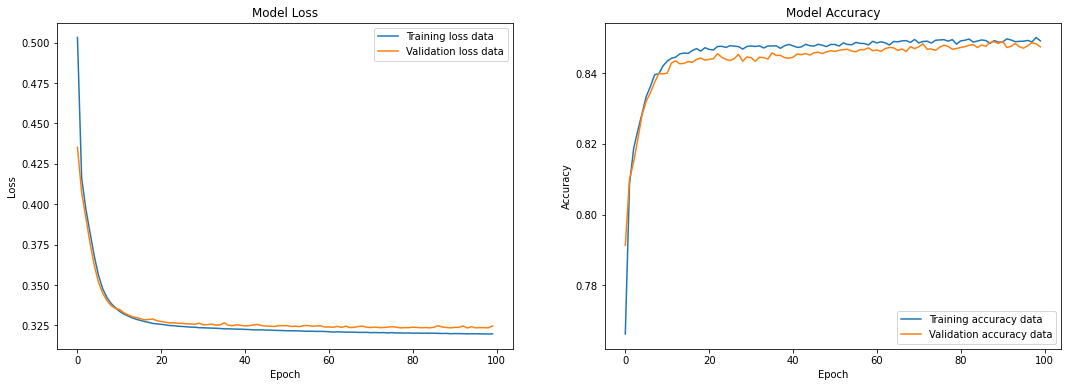

In [78]:
learning_curve(history1)

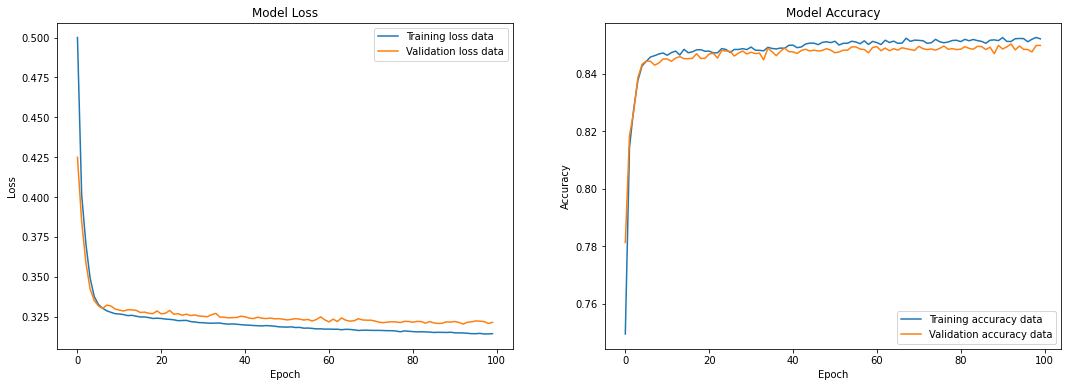

In [79]:
learning_curve(history2)

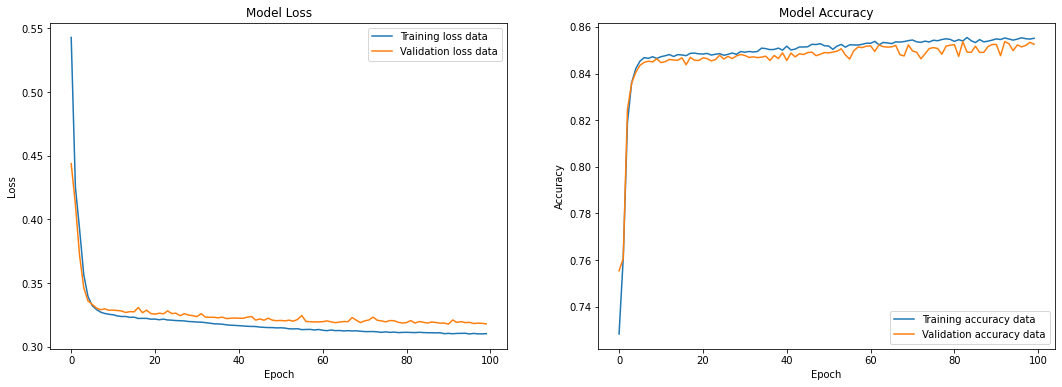

In [80]:
learning_curve(history3)

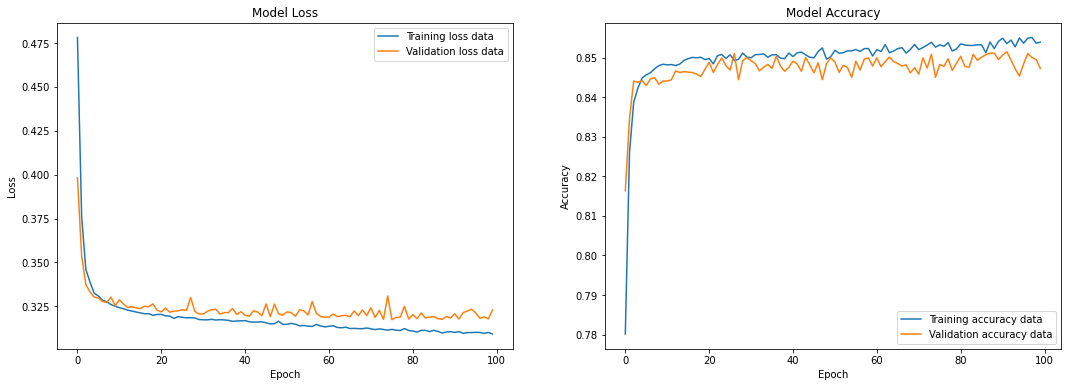

In [81]:
learning_curve(history4)

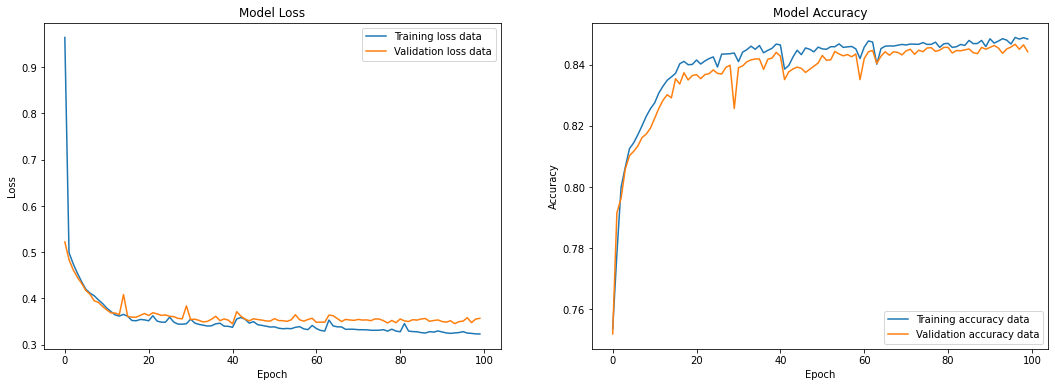

In [82]:
learning_curve(history5)

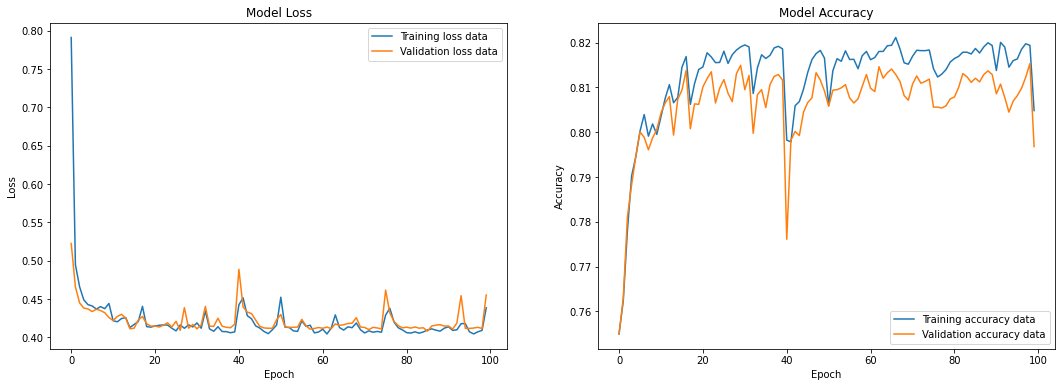

In [83]:
learning_curve(history6)

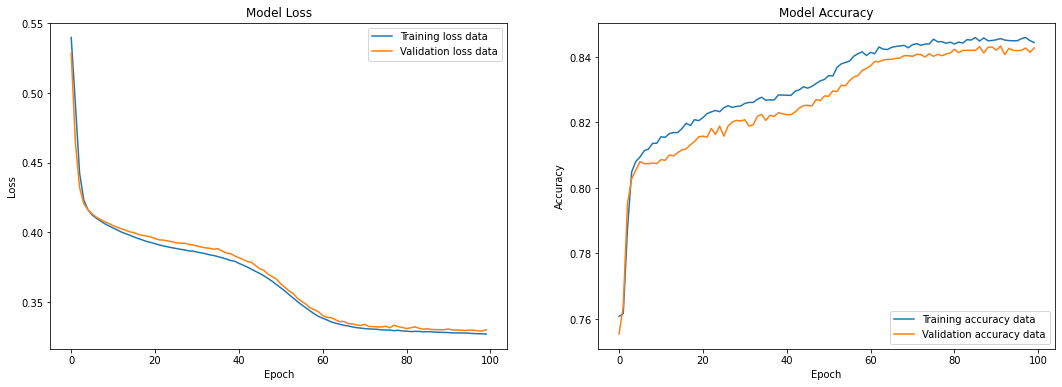

In [84]:
learning_curve(history7)

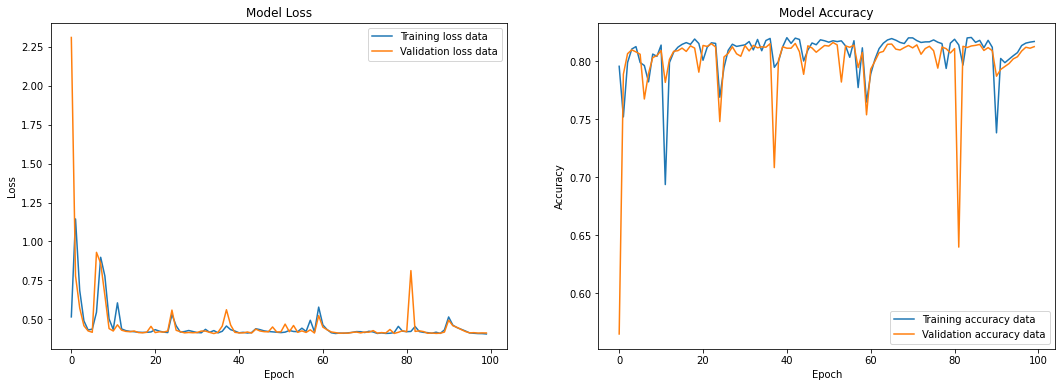

In [85]:
learning_curve(history8)

## Optimizers

Since history3 looked the best I will choose that one to configure the optimizer

In [97]:
model_rmsprop = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])
model_adam = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])
model_nadam = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])
model_sgd = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

In [98]:
model_rmsprop.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
history_rmsprop = model_rmsprop.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4958 - accuracy: 0.7608 - val_loss: 0.4271 - val_accuracy: 0.7554
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4092 - accuracy: 0.8143 - val_loss: 0.3968 - val_accuracy: 0.8145
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3829 - accuracy: 0.8253 - val_loss: 0.3695 - val_accuracy: 0.8271
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3614 - accuracy: 0.8343 - val_loss: 0.3519 - val_accuracy: 0.8323
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3475 - accuracy: 0.8405 - val_loss: 0.3424 - val_accuracy: 0.8382
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3400 - accuracy: 0.8426 - val_loss: 0.3379 - val_accuracy: 0.8391
Epoch 7/100
357/357 [==============================] - 1s 1ms/step - loss: 0.3357 - accuracy: 0.8448 - val_loss: 0.3366 - val_accuracy: 0.8416

In [99]:
model_sgd.compile(loss='binary_crossentropy', optimizer = 'sgd', metrics=['accuracy'])
history_sgd = model_sgd.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5910 - accuracy: 0.7601 - val_loss: 0.5520 - val_accuracy: 0.7554
Epoch 2/100
357/357 [==============================] - 1s 1ms/step - loss: 0.5367 - accuracy: 0.7608 - val_loss: 0.5321 - val_accuracy: 0.7554
Epoch 3/100
357/357 [==============================] - 1s 1ms/step - loss: 0.5172 - accuracy: 0.7608 - val_loss: 0.5101 - val_accuracy: 0.7554
Epoch 4/100
357/357 [==============================] - 1s 1ms/step - loss: 0.4951 - accuracy: 0.7608 - val_loss: 0.4871 - val_accuracy: 0.7554
Epoch 5/100
357/357 [==============================] - 0s 1ms/step - loss: 0.4763 - accuracy: 0.7608 - val_loss: 0.4708 - val_accuracy: 0.7554
Epoch 6/100
357/357 [==============================] - 1s 1ms/step - loss: 0.4640 - accuracy: 0.7608 - val_loss: 0.4604 - val_accuracy: 0.7554
Epoch 7/100
357/357 [==============================] - 1s 1ms/step - loss: 0.4556 - accuracy: 0.7608 - val_loss: 0.4525 - val_accuracy: 0.7554

In [101]:
model_nadam.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])
history_nadam = model_nadam.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5071 - accuracy: 0.7542 - val_loss: 0.4212 - val_accuracy: 0.8011
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3952 - accuracy: 0.8188 - val_loss: 0.3756 - val_accuracy: 0.8240
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3595 - accuracy: 0.8330 - val_loss: 0.3453 - val_accuracy: 0.8348
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.8417 - val_loss: 0.3350 - val_accuracy: 0.8407
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3314 - accuracy: 0.8444 - val_loss: 0.3345 - val_accuracy: 0.8404
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3291 - accuracy: 0.8463 - val_loss: 0.3282 - val_accuracy: 0.8445
Epoch 7/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3272 - accuracy: 0.8466 - val_loss: 0.3291 - val_accuracy: 0.8441

In [102]:
model_adam.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])
history_adam = model_adam.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5110 - accuracy: 0.7632 - val_loss: 0.4271 - val_accuracy: 0.8026
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4023 - accuracy: 0.8143 - val_loss: 0.3849 - val_accuracy: 0.8180
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3670 - accuracy: 0.8283 - val_loss: 0.3510 - val_accuracy: 0.8327
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3430 - accuracy: 0.8405 - val_loss: 0.3390 - val_accuracy: 0.8381
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3336 - accuracy: 0.8454 - val_loss: 0.3320 - val_accuracy: 0.8421
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3302 - accuracy: 0.8460 - val_loss: 0.3294 - val_accuracy: 0.8444
Epoch 7/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3284 - accuracy: 0.8462 - val_loss: 0.3279 - val_accuracy: 0.8462

Compare the optimizers

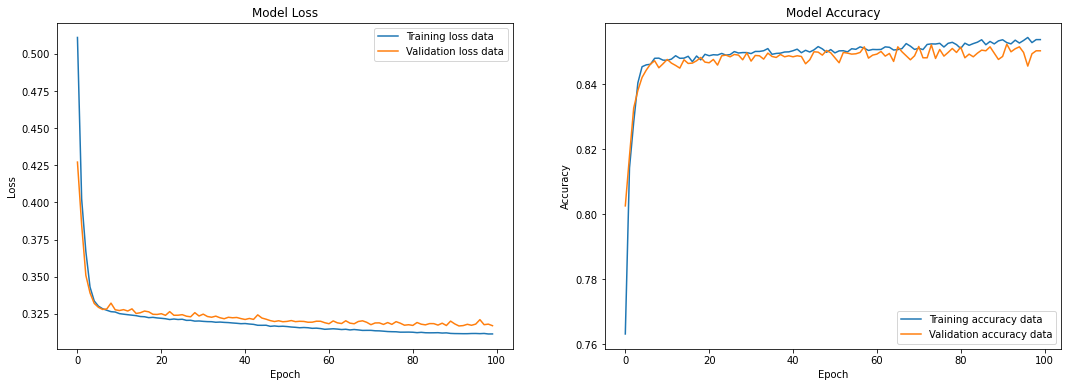

In [106]:
learning_curve(history_adam) #adam

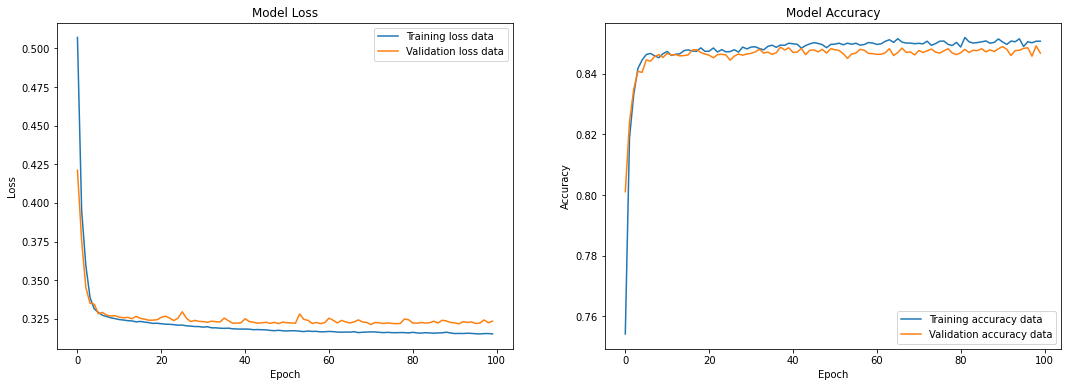

In [105]:
learning_curve(history_nadam)

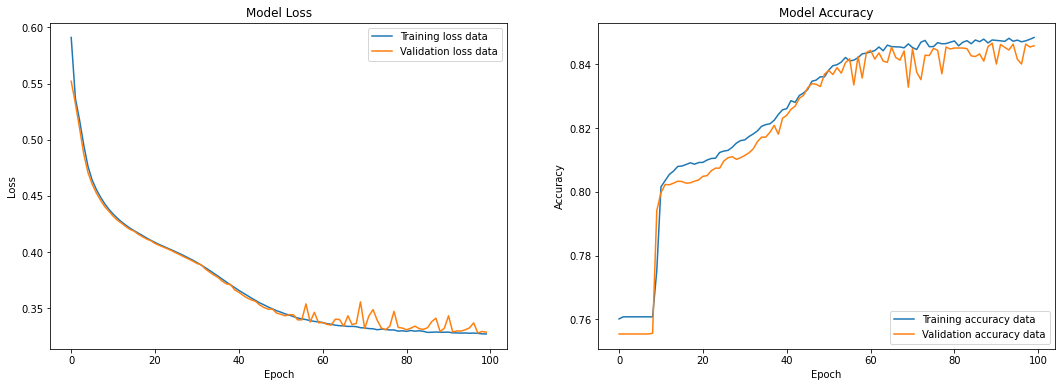

In [104]:
learning_curve(history_sgd)

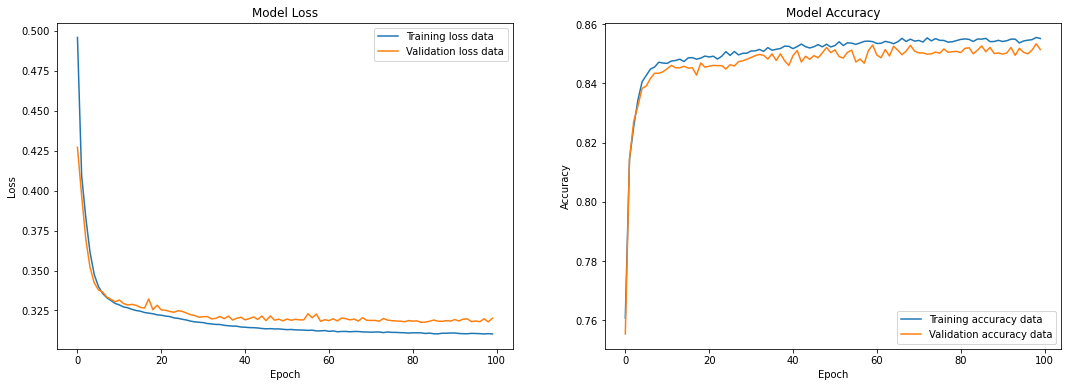

In [103]:
learning_curve(history_rmsprop)

looks like nadam and adam are very simular but adam has a slight advantage on accuracy.

##Trying different amounts of epochs

In [123]:
model_adam_10 = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])
model_adam_50 = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])
model_adam_100 = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])
model_adam_250 = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])
model_adam_500 = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])
model_adam_1000 = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])
model_adam_2000 = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

In [124]:
model_adam_10.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])
model_adam_50.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])
model_adam_100.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])
model_adam_250.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])
model_adam_500.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])
model_adam_1000.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])

In [125]:
history_adam_10 = model_adam_10.fit(XTRAIN, YTRAIN, epochs=10, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/10
357/357 [==============================] - 1s 2ms/step - loss: 0.5046 - accuracy: 0.7584 - val_loss: 0.4343 - val_accuracy: 0.7554
Epoch 2/10
357/357 [==============================] - 1s 2ms/step - loss: 0.4113 - accuracy: 0.8008 - val_loss: 0.3921 - val_accuracy: 0.8145
Epoch 3/10
357/357 [==============================] - 1s 2ms/step - loss: 0.3772 - accuracy: 0.8230 - val_loss: 0.3645 - val_accuracy: 0.8276
Epoch 4/10
357/357 [==============================] - 1s 2ms/step - loss: 0.3543 - accuracy: 0.8354 - val_loss: 0.3455 - val_accuracy: 0.8362
Epoch 5/10
357/357 [==============================] - 1s 2ms/step - loss: 0.3399 - accuracy: 0.8441 - val_loss: 0.3364 - val_accuracy: 0.8413
Epoch 6/10
357/357 [==============================] - 1s 2ms/step - loss: 0.3332 - accuracy: 0.8450 - val_loss: 0.3335 - val_accuracy: 0.8445
Epoch 7/10
357/357 [==============================] - 1s 2ms/step - loss: 0.3303 - accuracy: 0.8461 - val_loss: 0.3315 - val_accuracy: 0.8446
Epoch 

In [126]:
history_adam_50 = model_adam_50.fit(XTRAIN, YTRAIN, epochs=50, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/50
357/357 [==============================] - 1s 3ms/step - loss: 0.4949 - accuracy: 0.7608 - val_loss: 0.4229 - val_accuracy: 0.7554
Epoch 2/50
357/357 [==============================] - 1s 2ms/step - loss: 0.4057 - accuracy: 0.7943 - val_loss: 0.3932 - val_accuracy: 0.8181
Epoch 3/50
357/357 [==============================] - 1s 2ms/step - loss: 0.3835 - accuracy: 0.8240 - val_loss: 0.3728 - val_accuracy: 0.8270
Epoch 4/50
357/357 [==============================] - 1s 2ms/step - loss: 0.3675 - accuracy: 0.8336 - val_loss: 0.3589 - val_accuracy: 0.8333
Epoch 5/50
357/357 [==============================] - 1s 2ms/step - loss: 0.3572 - accuracy: 0.8382 - val_loss: 0.3512 - val_accuracy: 0.8391
Epoch 6/50
357/357 [==============================] - 1s 2ms/step - loss: 0.3508 - accuracy: 0.8404 - val_loss: 0.3462 - val_accuracy: 0.8416
Epoch 7/50
357/357 [==============================] - 1s 2ms/step - loss: 0.3460 - accuracy: 0.8427 - val_loss: 0.3451 - val_accuracy: 0.8409
Epoch 

In [127]:
history_adam_100 = model_adam_100.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 3ms/step - loss: 0.4874 - accuracy: 0.7784 - val_loss: 0.4064 - val_accuracy: 0.8113
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3916 - accuracy: 0.8207 - val_loss: 0.3790 - val_accuracy: 0.8226
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3657 - accuracy: 0.8335 - val_loss: 0.3568 - val_accuracy: 0.8335
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3469 - accuracy: 0.8409 - val_loss: 0.3453 - val_accuracy: 0.8391
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3369 - accuracy: 0.8438 - val_loss: 0.3364 - val_accuracy: 0.8419
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3331 - accuracy: 0.8453 - val_loss: 0.3391 - val_accuracy: 0.8390
Epoch 7/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3312 - accuracy: 0.8474 - val_loss: 0.3345 - val_accuracy: 0.8425

In [128]:
history_adam_250 = model_adam_250.fit(XTRAIN, YTRAIN, epochs=250, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/250
357/357 [==============================] - 1s 2ms/step - loss: 0.4560 - accuracy: 0.7682 - val_loss: 0.4036 - val_accuracy: 0.8099
Epoch 2/250
357/357 [==============================] - 1s 2ms/step - loss: 0.3893 - accuracy: 0.8211 - val_loss: 0.3760 - val_accuracy: 0.8255
Epoch 3/250
357/357 [==============================] - 1s 2ms/step - loss: 0.3702 - accuracy: 0.8316 - val_loss: 0.3618 - val_accuracy: 0.8331
Epoch 4/250
357/357 [==============================] - 1s 2ms/step - loss: 0.3590 - accuracy: 0.8365 - val_loss: 0.3534 - val_accuracy: 0.8406
Epoch 5/250
357/357 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.8404 - val_loss: 0.3484 - val_accuracy: 0.8405
Epoch 6/250
357/357 [==============================] - 1s 2ms/step - loss: 0.3467 - accuracy: 0.8437 - val_loss: 0.3441 - val_accuracy: 0.8421
Epoch 7/250
357/357 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.8453 - val_loss: 0.3405 - val_accuracy: 0.8446

In [129]:
history_adam_500 = model_adam_500.fit(XTRAIN, YTRAIN, epochs=500, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/500
357/357 [==============================] - 1s 2ms/step - loss: 0.5363 - accuracy: 0.7777 - val_loss: 0.4144 - val_accuracy: 0.8121
Epoch 2/500
357/357 [==============================] - 1s 2ms/step - loss: 0.3978 - accuracy: 0.8190 - val_loss: 0.3865 - val_accuracy: 0.8178
Epoch 3/500
357/357 [==============================] - 1s 2ms/step - loss: 0.3761 - accuracy: 0.8258 - val_loss: 0.3673 - val_accuracy: 0.8277
Epoch 4/500
357/357 [==============================] - 1s 2ms/step - loss: 0.3595 - accuracy: 0.8311 - val_loss: 0.3517 - val_accuracy: 0.8306
Epoch 5/500
357/357 [==============================] - 1s 2ms/step - loss: 0.3460 - accuracy: 0.8370 - val_loss: 0.3406 - val_accuracy: 0.8366
Epoch 6/500
357/357 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.8404 - val_loss: 0.3342 - val_accuracy: 0.8399
Epoch 7/500
357/357 [==============================] - 1s 2ms/step - loss: 0.3319 - accuracy: 0.8440 - val_loss: 0.3316 - val_accuracy: 0.8417

In [130]:
import time

start = time.time()
history_adam_1000 = model_adam_1000.fit(XTRAIN, YTRAIN, epochs=1000, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)
end = time.time()
runtime= end - start

Epoch 1/1000
357/357 [==============================] - 1s 2ms/step - loss: 0.4753 - accuracy: 0.7608 - val_loss: 0.4157 - val_accuracy: 0.7554
Epoch 2/1000
357/357 [==============================] - 1s 2ms/step - loss: 0.3987 - accuracy: 0.8090 - val_loss: 0.3847 - val_accuracy: 0.8198
Epoch 3/1000
357/357 [==============================] - 1s 2ms/step - loss: 0.3741 - accuracy: 0.8307 - val_loss: 0.3628 - val_accuracy: 0.8351
Epoch 4/1000
357/357 [==============================] - 1s 2ms/step - loss: 0.3602 - accuracy: 0.8367 - val_loss: 0.3522 - val_accuracy: 0.8394
Epoch 5/1000
357/357 [==============================] - 1s 2ms/step - loss: 0.3525 - accuracy: 0.8407 - val_loss: 0.3472 - val_accuracy: 0.8406
Epoch 6/1000
357/357 [==============================] - 1s 2ms/step - loss: 0.3475 - accuracy: 0.8429 - val_loss: 0.3430 - val_accuracy: 0.8431
Epoch 7/1000
357/357 [==============================] - 1s 2ms/step - loss: 0.3434 - accuracy: 0.8435 - val_loss: 0.3409 - val_accuracy:

In [ ]:
import datetime
str(datetime.timedelta(seconds=runtime))

###Learning curves

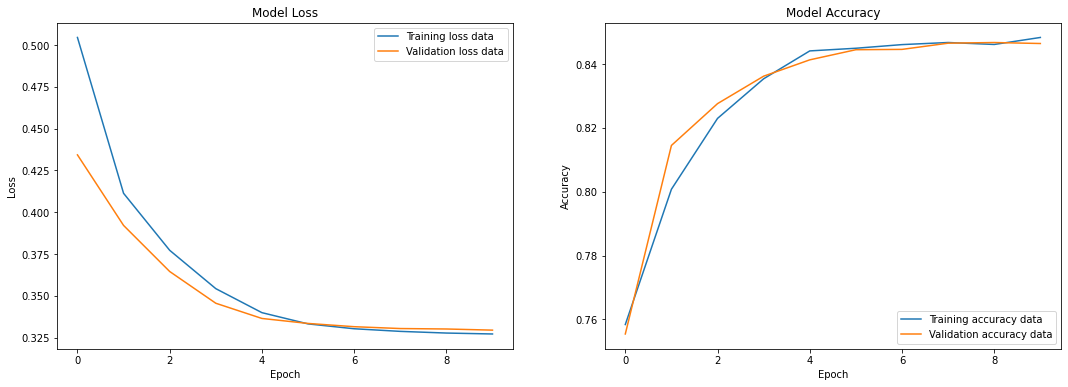

In [131]:
learning_curve(history_adam_10)

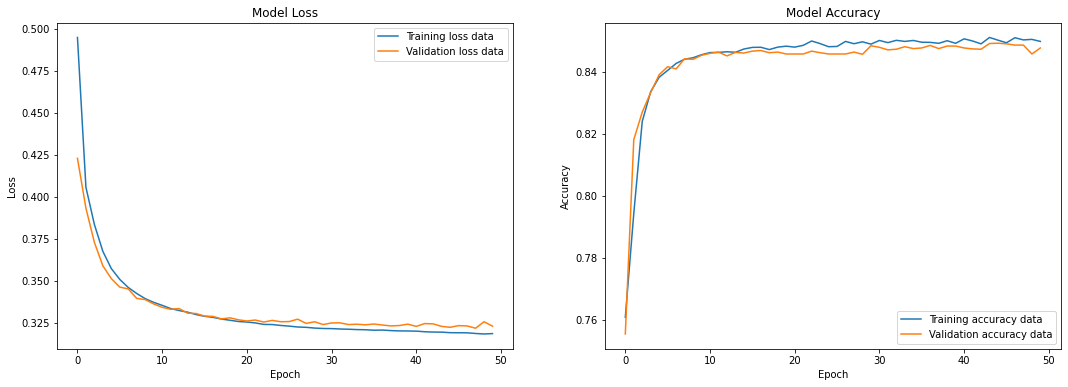

In [132]:
learning_curve(history_adam_50)

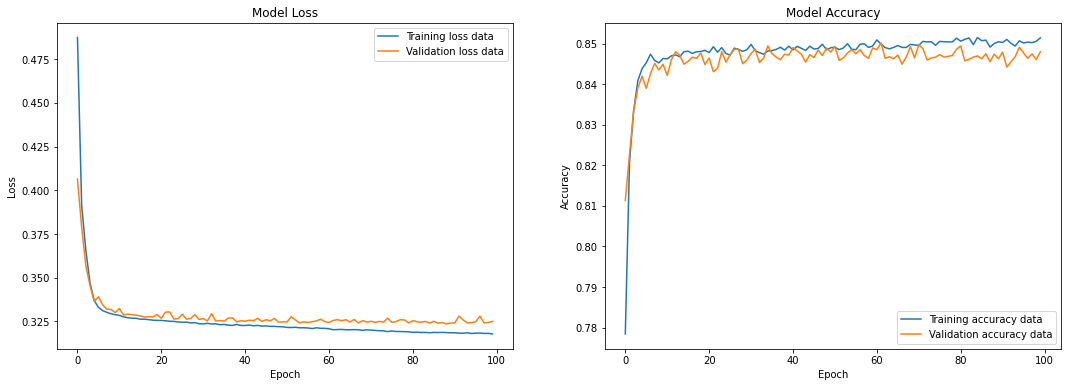

In [133]:
learning_curve(history_adam_100)

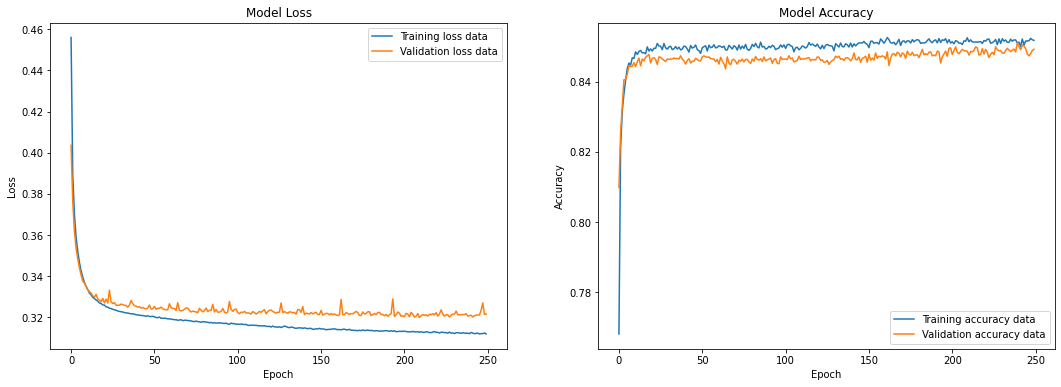

In [135]:
learning_curve(history_adam_250)

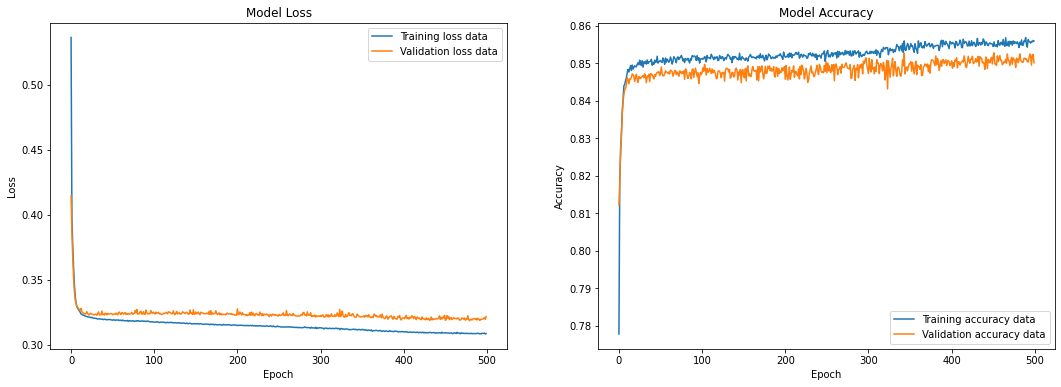

In [136]:
learning_curve(history_adam_500)

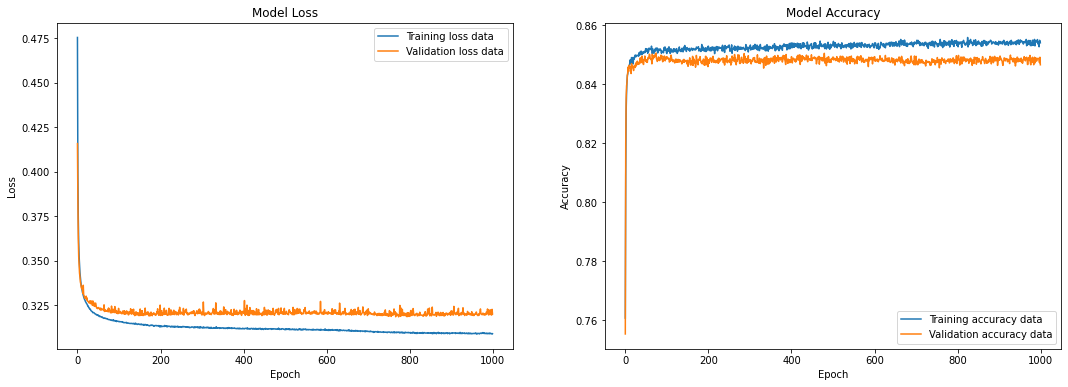

In [137]:
learning_curve(history_adam_1000)

##Trying different batch sizes

In [146]:
model_adam_2 = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])
model_adam_4 = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])
model_adam_8 = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])
model_adam_16 = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])
model_adam_32 = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])
model_adam_64 = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])
model_adam_128 = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])
model_adam_256 = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])
model_adam_512 = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

In [147]:
model_adam_2.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])
model_adam_4.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])
model_adam_8.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])
model_adam_16.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])
model_adam_32.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])
model_adam_64.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])
model_adam_128.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])
model_adam_256.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])
model_adam_512.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics=['accuracy'])

In [148]:
start = time.time()
history_adam_2 = model_adam_2.fit(XTRAIN, YTRAIN, epochs=100, batch_size=2, validation_data = (XVALID, YVALID),verbose=1)
end = time.time()
runtime= end - start

Epoch 1/100
11397/11397 [==============================] - 18s 2ms/step - loss: 0.4326 - accuracy: 0.8174 - val_loss: 0.3540 - val_accuracy: 0.8433
Epoch 2/100
11397/11397 [==============================] - 18s 2ms/step - loss: 0.3424 - accuracy: 0.8443 - val_loss: 0.3595 - val_accuracy: 0.8381
Epoch 3/100
11397/11397 [==============================] - 21s 2ms/step - loss: 0.3351 - accuracy: 0.8451 - val_loss: 0.3335 - val_accuracy: 0.8435
Epoch 4/100
11397/11397 [==============================] - 18s 2ms/step - loss: 0.3317 - accuracy: 0.8457 - val_loss: 0.3310 - val_accuracy: 0.8446
Epoch 5/100
11397/11397 [==============================] - 18s 2ms/step - loss: 0.3299 - accuracy: 0.8459 - val_loss: 0.3386 - val_accuracy: 0.8421
Epoch 6/100
11397/11397 [==============================] - 19s 2ms/step - loss: 0.3284 - accuracy: 0.8465 - val_loss: 0.3288 - val_accuracy: 0.8454
Epoch 7/100
11397/11397 [==============================] - 18s 2ms/step - loss: 0.3272 - accuracy: 0.8465 - val_

In [149]:
history_adam_4 = model_adam_4.fit(XTRAIN, YTRAIN, epochs=100, batch_size=4, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
5699/5699 [==============================] - 9s 2ms/step - loss: 0.3919 - accuracy: 0.8196 - val_loss: 0.3357 - val_accuracy: 0.8403
Epoch 2/100
5699/5699 [==============================] - 8s 1ms/step - loss: 0.3340 - accuracy: 0.8451 - val_loss: 0.3298 - val_accuracy: 0.8446
Epoch 3/100
5699/5699 [==============================] - 8s 1ms/step - loss: 0.3292 - accuracy: 0.8473 - val_loss: 0.3358 - val_accuracy: 0.8406
Epoch 4/100
5699/5699 [==============================] - 9s 2ms/step - loss: 0.3270 - accuracy: 0.8470 - val_loss: 0.3269 - val_accuracy: 0.8449
Epoch 5/100
5699/5699 [==============================] - 8s 1ms/step - loss: 0.3250 - accuracy: 0.8489 - val_loss: 0.3288 - val_accuracy: 0.8428
Epoch 6/100
5699/5699 [==============================] - 9s 2ms/step - loss: 0.3232 - accuracy: 0.8486 - val_loss: 0.3341 - val_accuracy: 0.8410
Epoch 7/100
5699/5699 [==============================] - 9s 1ms/step - loss: 0.3234 - accuracy: 0.8482 - val_loss: 0.3253 - val_ac

In [150]:
history_adam_8 = model_adam_8.fit(XTRAIN, YTRAIN, epochs=100, batch_size=8, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
2850/2850 [==============================] - 5s 2ms/step - loss: 0.4201 - accuracy: 0.7980 - val_loss: 0.3678 - val_accuracy: 0.8258
Epoch 2/100
2850/2850 [==============================] - 5s 2ms/step - loss: 0.3529 - accuracy: 0.8420 - val_loss: 0.3431 - val_accuracy: 0.8415
Epoch 3/100
2850/2850 [==============================] - 5s 2ms/step - loss: 0.3410 - accuracy: 0.8439 - val_loss: 0.3350 - val_accuracy: 0.8445
Epoch 4/100
2850/2850 [==============================] - 5s 2ms/step - loss: 0.3357 - accuracy: 0.8457 - val_loss: 0.3328 - val_accuracy: 0.8440
Epoch 5/100
2850/2850 [==============================] - 4s 2ms/step - loss: 0.3326 - accuracy: 0.8476 - val_loss: 0.3304 - val_accuracy: 0.8459
Epoch 6/100
2850/2850 [==============================] - 4s 2ms/step - loss: 0.3302 - accuracy: 0.8477 - val_loss: 0.3292 - val_accuracy: 0.8452
Epoch 7/100
2850/2850 [==============================] - 4s 2ms/step - loss: 0.3280 - accuracy: 0.8484 - val_loss: 0.3296 - val_ac

In [151]:
history_adam_16 = model_adam_16.fit(XTRAIN, YTRAIN, epochs=100, batch_size=16, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
1425/1425 [==============================] - 2s 2ms/step - loss: 0.4472 - accuracy: 0.7800 - val_loss: 0.3974 - val_accuracy: 0.8170
Epoch 2/100
1425/1425 [==============================] - 4s 3ms/step - loss: 0.3795 - accuracy: 0.8275 - val_loss: 0.3588 - val_accuracy: 0.8347
Epoch 3/100
1425/1425 [==============================] - 4s 3ms/step - loss: 0.3523 - accuracy: 0.8410 - val_loss: 0.3436 - val_accuracy: 0.8418
Epoch 4/100
1425/1425 [==============================] - 3s 2ms/step - loss: 0.3416 - accuracy: 0.8445 - val_loss: 0.3374 - val_accuracy: 0.8423
Epoch 5/100
1425/1425 [==============================] - 2s 2ms/step - loss: 0.3353 - accuracy: 0.8464 - val_loss: 0.3318 - val_accuracy: 0.8447
Epoch 6/100
1425/1425 [==============================] - 2s 2ms/step - loss: 0.3322 - accuracy: 0.8477 - val_loss: 0.3296 - val_accuracy: 0.8447
Epoch 7/100
1425/1425 [==============================] - 2s 2ms/step - loss: 0.3298 - accuracy: 0.8480 - val_loss: 0.3283 - val_ac

In [152]:
history_adam_32 = model_adam_32.fit(XTRAIN, YTRAIN, epochs=100, batch_size=32, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
713/713 [==============================] - 1s 2ms/step - loss: 0.4684 - accuracy: 0.7826 - val_loss: 0.3812 - val_accuracy: 0.8192
Epoch 2/100
713/713 [==============================] - 1s 2ms/step - loss: 0.3577 - accuracy: 0.8342 - val_loss: 0.3412 - val_accuracy: 0.8389
Epoch 3/100
713/713 [==============================] - 1s 2ms/step - loss: 0.3370 - accuracy: 0.8426 - val_loss: 0.3345 - val_accuracy: 0.8422
Epoch 4/100
713/713 [==============================] - 1s 2ms/step - loss: 0.3321 - accuracy: 0.8452 - val_loss: 0.3338 - val_accuracy: 0.8440
Epoch 5/100
713/713 [==============================] - 1s 2ms/step - loss: 0.3300 - accuracy: 0.8448 - val_loss: 0.3308 - val_accuracy: 0.8429
Epoch 6/100
713/713 [==============================] - 1s 2ms/step - loss: 0.3286 - accuracy: 0.8463 - val_loss: 0.3303 - val_accuracy: 0.8442
Epoch 7/100
713/713 [==============================] - 1s 2ms/step - loss: 0.3278 - accuracy: 0.8473 - val_loss: 0.3322 - val_accuracy: 0.8432

In [153]:
history_adam_64 = model_adam_64.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4909 - accuracy: 0.7726 - val_loss: 0.4083 - val_accuracy: 0.8129
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3896 - accuracy: 0.8205 - val_loss: 0.3708 - val_accuracy: 0.8232
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3547 - accuracy: 0.8337 - val_loss: 0.3414 - val_accuracy: 0.8366
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.8425 - val_loss: 0.3372 - val_accuracy: 0.8382
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3316 - accuracy: 0.8460 - val_loss: 0.3301 - val_accuracy: 0.8436
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3283 - accuracy: 0.8465 - val_loss: 0.3305 - val_accuracy: 0.8441
Epoch 7/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3264 - accuracy: 0.8483 - val_loss: 0.3306 - val_accuracy: 0.8447

In [154]:
history_adam_128 = model_adam_128.fit(XTRAIN, YTRAIN, epochs=100, batch_size=128, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
179/179 [==============================] - 0s 2ms/step - loss: 0.5961 - accuracy: 0.7214 - val_loss: 0.4820 - val_accuracy: 0.7554
Epoch 2/100
179/179 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.7608 - val_loss: 0.4215 - val_accuracy: 0.7554
Epoch 3/100
179/179 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.7608 - val_loss: 0.4032 - val_accuracy: 0.7555
Epoch 4/100
179/179 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.7952 - val_loss: 0.3886 - val_accuracy: 0.8227
Epoch 5/100
179/179 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.8296 - val_loss: 0.3722 - val_accuracy: 0.8283
Epoch 6/100
179/179 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8323 - val_loss: 0.3547 - val_accuracy: 0.8342
Epoch 7/100
179/179 [==============================] - 0s 2ms/step - loss: 0.3488 - accuracy: 0.8375 - val_loss: 0.3430 - val_accuracy: 0.8391

In [155]:
history_adam_256 = model_adam_256.fit(XTRAIN, YTRAIN, epochs=100, batch_size=256, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
90/90 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.6108 - val_loss: 0.6720 - val_accuracy: 0.7665
Epoch 2/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.7758 - val_loss: 0.6496 - val_accuracy: 0.7803
Epoch 3/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.7989 - val_loss: 0.6269 - val_accuracy: 0.8042
Epoch 4/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.8115 - val_loss: 0.6013 - val_accuracy: 0.8115
Epoch 5/100
90/90 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.8151 - val_loss: 0.5783 - val_accuracy: 0.8126
Epoch 6/100
90/90 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.8174 - val_loss: 0.5590 - val_accuracy: 0.8148
Epoch 7/100
90/90 [==============================] - 0s 2ms/step - loss: 0.5491 - accuracy: 0.8212 - val_loss: 0.5414 - val_accuracy: 0.8186
Epoch 8/100
9

In [156]:
history_adam_512 = model_adam_512.fit(XTRAIN, YTRAIN, epochs=100, batch_size=512, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
45/45 [==============================] - 0s 5ms/step - loss: 0.6542 - accuracy: 0.7288 - val_loss: 0.6228 - val_accuracy: 0.7543
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: 0.5875 - accuracy: 0.7616 - val_loss: 0.5530 - val_accuracy: 0.7570
Epoch 3/100
45/45 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.7664 - val_loss: 0.4822 - val_accuracy: 0.7668
Epoch 4/100
45/45 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.7834 - val_loss: 0.4391 - val_accuracy: 0.7888
Epoch 5/100
45/45 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.8047 - val_loss: 0.4188 - val_accuracy: 0.8036
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8117 - val_loss: 0.4088 - val_accuracy: 0.8092
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8146 - val_loss: 0.4023 - val_accuracy: 0.8117
Epoch 8/100
4

In [166]:
import datetime
str(datetime.timedelta(seconds=runtime))

'0:33:21.994689'

side note it took a over a half hour to just compute the batch size of 2 with 100 epochs!!!

###Learning curves

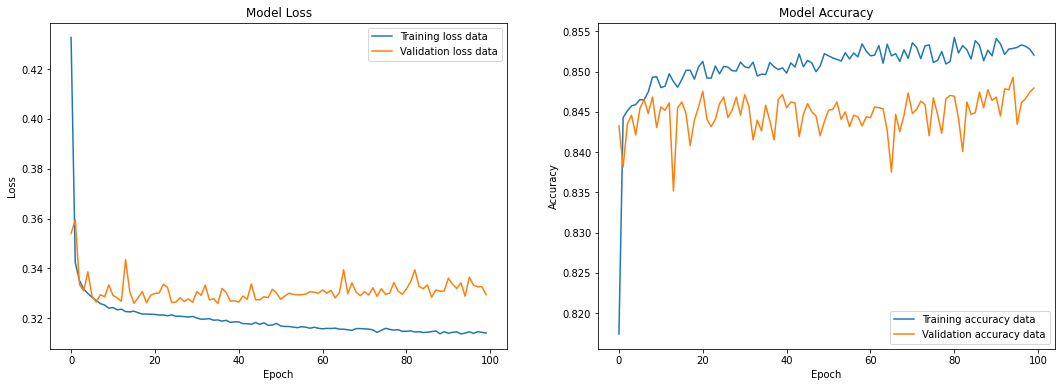

In [157]:
learning_curve(history_adam_2)

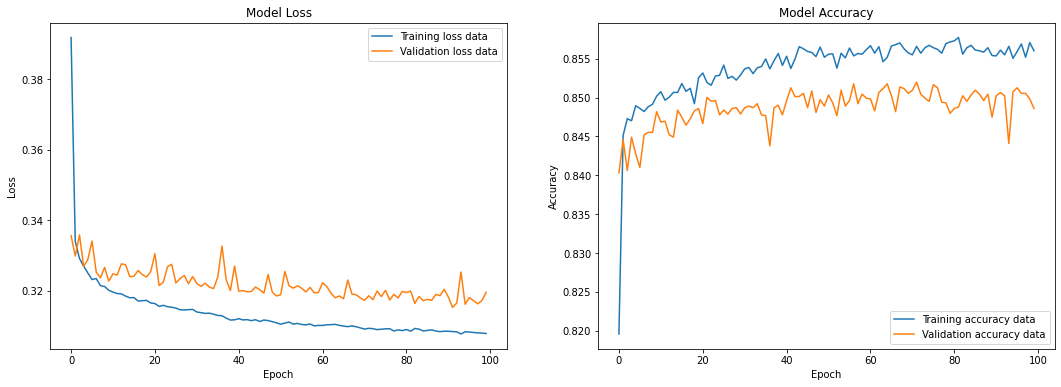

In [158]:
learning_curve(history_adam_4)

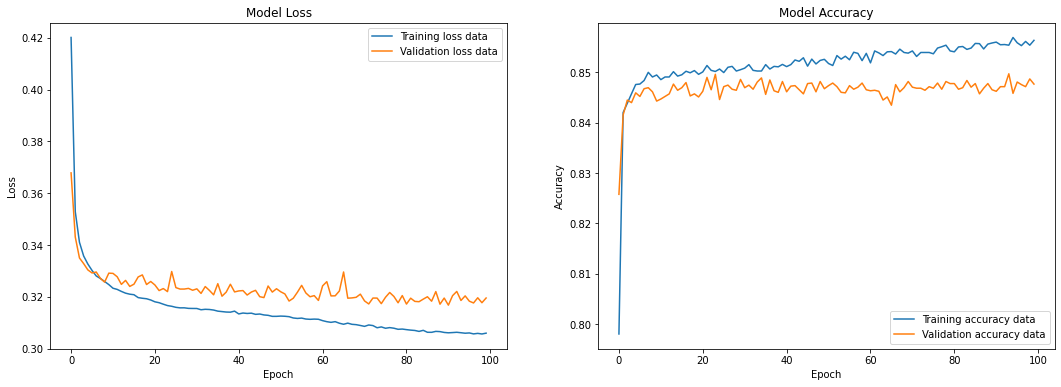

In [159]:
learning_curve(history_adam_8)

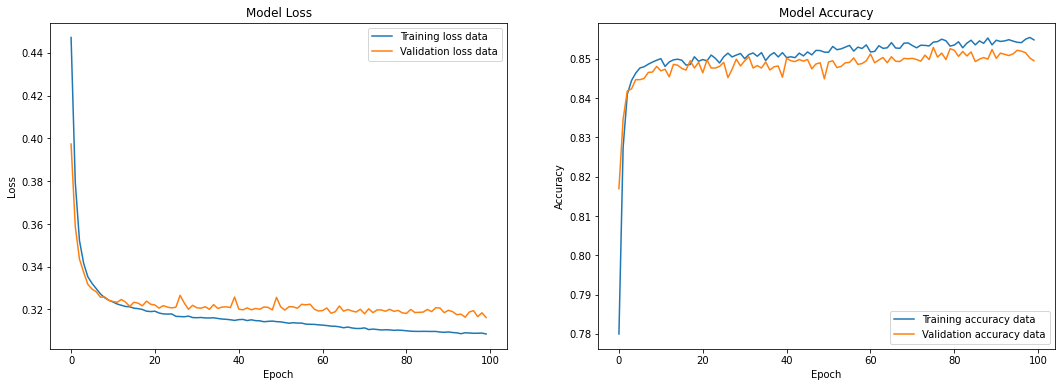

In [160]:
learning_curve(history_adam_16)

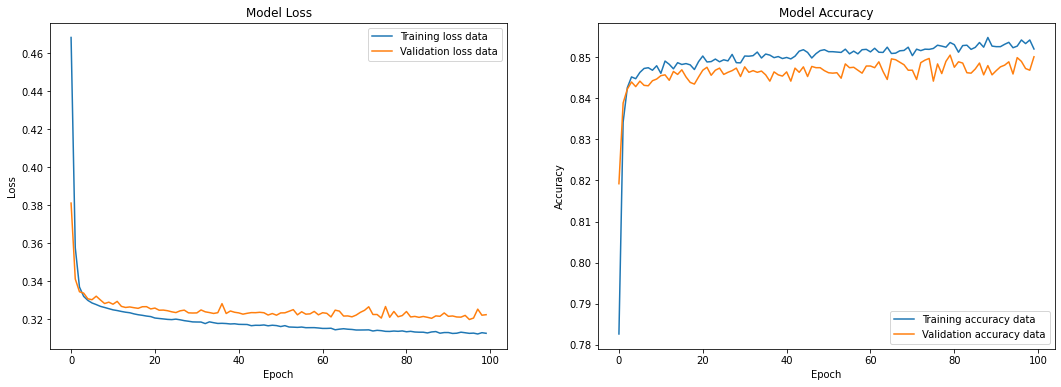

In [161]:
learning_curve(history_adam_32)

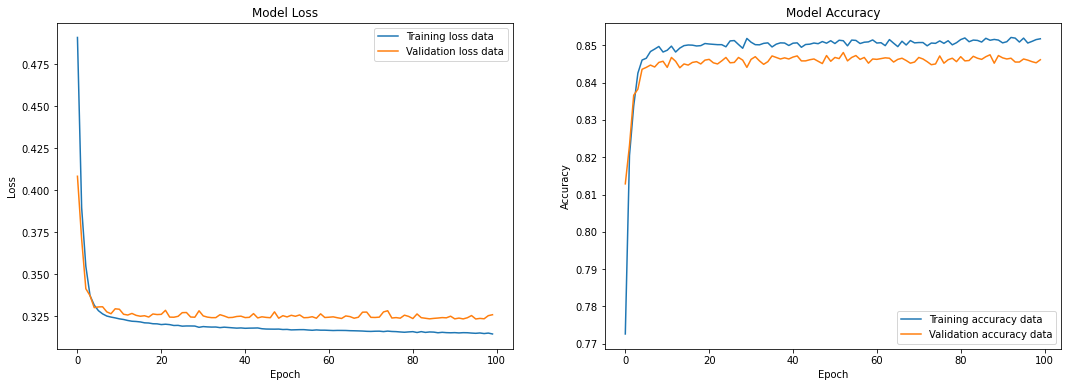

In [162]:
learning_curve(history_adam_64)

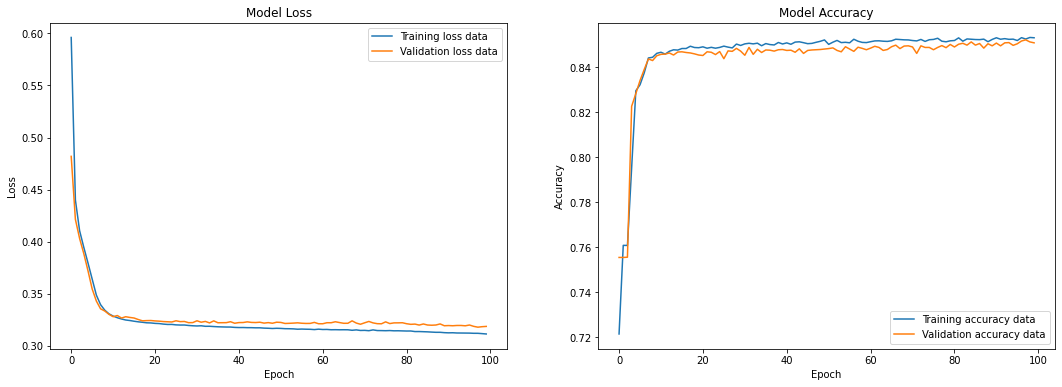

In [163]:
learning_curve(history_adam_128)

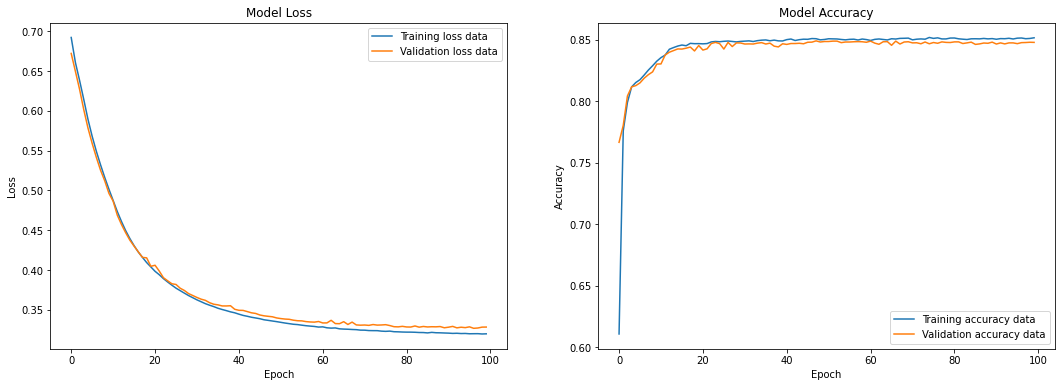

In [164]:
learning_curve(history_adam_256)

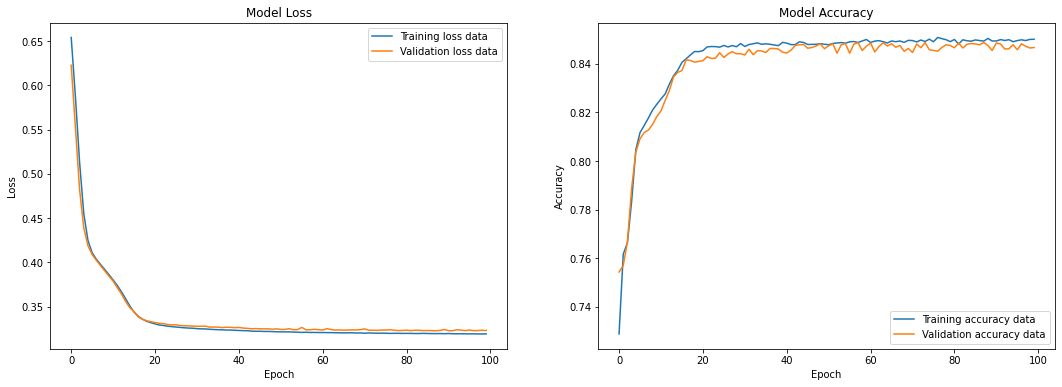

In [165]:
learning_curve(history_adam_512)